1. Dataset

At this time, mobile apss are everywhere and have became an integral part of everyday life. Because it is handy and is    subjected as a portable app, more and more apss are being developed. In this analysis, a comprehensive analysis will be      conducted to discover the Android app market by comparing over ten thousand apps in Google play across different categories. 
Any results derived from the analysis are expected to drive growth and users retention. 

The dataset used here are obtained from Kaggle https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv which consist of 13 attributes. 

In [1]:
# Loading dataset into python 
import pandas as pd
app_with_duplicates = pd.read_csv('apps.csv')

# Drop duplicate apps since each row should represent each app
app = app_with_duplicates.drop_duplicates()

# Identify the character of the data and the number of apps beng analysed
print(app.info())
print('Total number of apps in the dataset = ', len(app))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None
Total number of apps in the dataset =  9659


Based on the outputs above, the number of apps being compared is 9659. Hovewer, we could not directly performing data analysis as the data type of both Installs and Price are an not numeric data type as what we expected. This might be because those attributes are not only consisted of [0,9] digits. As the names suggest, we would like those two attributes become a numeric datatype. Hence, we should do data cleaning to prepare the data for further analysis.
Beforehand, we should first discover what makes the Install and Price variables having an object data type. 

In [2]:
# Identify the non-numeric character lying in Install and Price variable
non_numberic_install = app.Installs.str.contains('[^0-9.-]')
(app.loc[non_numberic_install].head())

non_numberic_price = app.Price.str.contains('[^0-9.-]')
(app.loc[non_numberic_price].head())

set(app.Installs[non_numberic_install])

set(app.Price[non_numberic_price])

{'$0.99',
 '$1.00',
 '$1.04',
 '$1.20',
 '$1.26',
 '$1.29',
 '$1.49',
 '$1.50',
 '$1.59',
 '$1.61',
 '$1.70',
 '$1.75',
 '$1.76',
 '$1.96',
 '$1.97',
 '$1.99',
 '$10.00',
 '$10.99',
 '$109.99',
 '$11.99',
 '$12.99',
 '$13.99',
 '$14.00',
 '$14.99',
 '$15.46',
 '$15.99',
 '$154.99',
 '$16.99',
 '$17.99',
 '$18.99',
 '$19.40',
 '$19.90',
 '$19.99',
 '$2.00',
 '$2.49',
 '$2.50',
 '$2.56',
 '$2.59',
 '$2.60',
 '$2.90',
 '$2.95',
 '$2.99',
 '$200.00',
 '$24.99',
 '$25.99',
 '$28.99',
 '$29.99',
 '$299.99',
 '$3.02',
 '$3.04',
 '$3.08',
 '$3.28',
 '$3.49',
 '$3.61',
 '$3.88',
 '$3.90',
 '$3.95',
 '$3.99',
 '$30.99',
 '$33.99',
 '$37.99',
 '$379.99',
 '$389.99',
 '$39.99',
 '$394.99',
 '$399.99',
 '$4.29',
 '$4.49',
 '$4.59',
 '$4.60',
 '$4.77',
 '$4.80',
 '$4.84',
 '$4.85',
 '$4.99',
 '$400.00',
 '$46.99',
 '$5.00',
 '$5.49',
 '$5.99',
 '$6.49',
 '$6.99',
 '$7.49',
 '$7.99',
 '$74.99',
 '$79.99',
 '$8.49',
 '$8.99',
 '$89.99',
 '$9.00',
 '$9.99'}

The ouputs above suggest that the object data type attcahed on both attributes are caused by +,',', and $. Hence, we need to clean the data to get rid those caharacters as the following

2. Data Cleaning

In [3]:
# List of characters to remove
chars_to_remove = [',', '$', '+']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        app[col] = app[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    app[col] = pd.to_numeric(app[col]) 

After cleaning the dataset and changing the data type for Install and Price variables into a numeric datatype, we could now move into the data analysis part. First, we could set the questions that we would like to addrres using the available dataset 
- Which category has the highest share of active apps in the market?
- Is any specific category dominating the market?
- Which categories have the fewest number of apps?

To answer such questions, we could perform data visualisation to gain some insights as follow 

3. Exploring apps categories

In [4]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(app['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = app['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


We can see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market share. Interestingly, Tools, Business and Medical apps are also at the top.

After having discovered the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app. 

4. Distribution of app rating

In [5]:
# Average rating of apps
avg_app_rating = app['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = app['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


From the plot given above, we found that the average ratings across all app categories lies at 4.17. This indicates that most apps being reviewed here had been given high user rating since the scale is on 1 to 5. Also, the histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

5. Size and price of an app
After finding out the most donwloaded apps and theirs users ratings, let's now examining the app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. 

How can we effectively come up with strategies to size and price our app?
 - Does the size of an app affect its rating?
 - Do users really care about system-heavy apps or do they prefer light-weighted apps?
 - Does the price of an app affect its rating?
 - Do users always prefer free apps over paid apps?
To find the answers of the questions given above, we could do data visualisation as follow

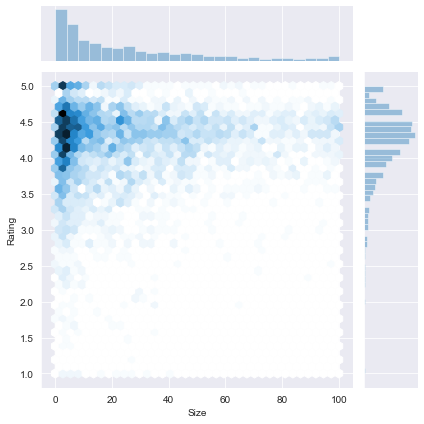

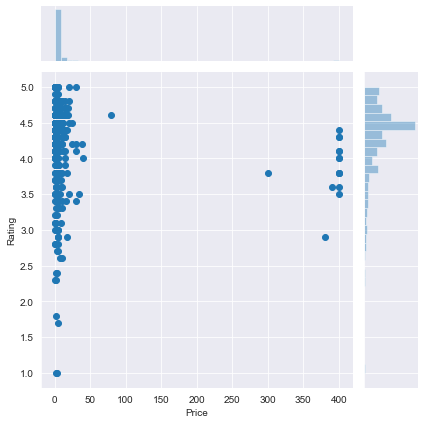

In [6]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = app[(~app["Rating"].isnull()) & (~app["Size"].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

We find that the majority of top rated apps, rated over 4, range from 2 MB to 20 MB. We also find that the vast majority of    apps price themselves under \$10

6. Relation between app category and app price
So now comes the part where we would analysze the relationship between app category and app price. How are companies and developers supposed to make ends meet? What strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when deciding the right pricing strategy for the mobile app. It is important to consider the willingness of the customer to pay for mobile app. Setting wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.


,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


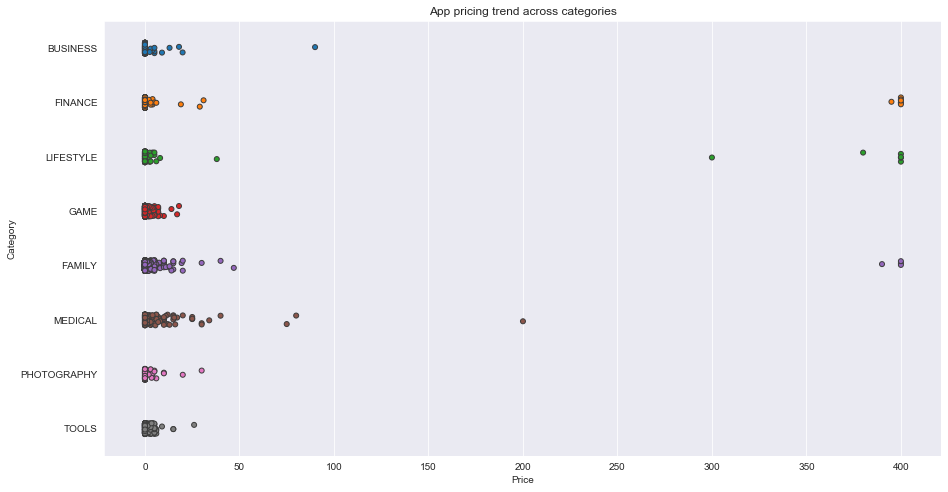

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = app[app.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats["Price"] > 200]
apps_above_200

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept as a free mobile app. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Based in the graph resulted above, we see that Medical and Family apps are the most expensive. Some medical apps are even more than $80! All game apps actegory are affordable as they are priced below $20.

8. Popularity of paid apps vs free apps
For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

Free to download.
Main source of income often comes from advertisements.
Often created by companies that have other products and the app serves as an extension of those products.
Can serve as a tool for customer retention, communication, and customer service.
Some characteristics of paid apps are:

Users are asked to pay once for the app to download and use it.
The user can't really get a feel for the app before buying it.
Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

In [8]:
trace0 = go.Box(
    # Data for paid apps
    y=app[app['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=app[app['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})